In [58]:
import sys  
sys.path.insert(0, '/content/drive/MyDrive/overoptimism')

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits, fetch_covtype    
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import adjusted_rand_score as ARI
from rock import ROCK

import matplotlib.pyplot as plt

import logging
import sys
from tqdm.notebook import tqdm

In [61]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

In [62]:
experiment = []
run_id = 0

In [63]:
seed = 0
datasets = []
for s in range(seed, seed+10):
      datasets.append(make_moons(n_samples=1000, noise=0.15,
            shuffle=True, random_state=s))

In [64]:
tmaxs = range(0, 30)

In [65]:
for t in tqdm(range(0, len(tmaxs))):
  for d in tqdm(range(0, len(datasets))):
      dataset = datasets[d]
      run = {}
      scaler = StandardScaler()
      data = scaler.fit_transform(dataset[0])
      rock = ROCK(tmax=tmaxs[t]).fit(data).labels_
      gt = dataset[1]
      run['AMI'] = AMI(rock, gt)
      run['ARI'] = ARI(rock, gt)
      run['tmax'] = tmaxs[t]

      experiment.append(run)

In [26]:
import pandas as pd
results = pd.read_csv('/content/drive/MyDrive/overoptimism/results/ROCK_hyper.csv')

In [69]:
results = pd.DataFrame(experiment)

In [70]:
results.to_csv('ROCK_Moon_hypersearch.csv')

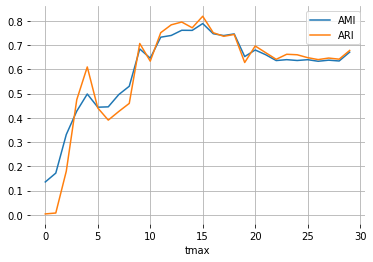

In [72]:
import matplotlib.pyplot as plt
results.groupby('tmax').mean().plot()
plt.savefig('Rock_moon_hypersearch_scaled.png')

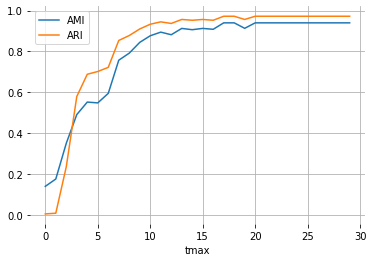

In [77]:
results.groupby('tmax').max().plot()
plt.savefig('Rock_moon_hypersearch_max.png')

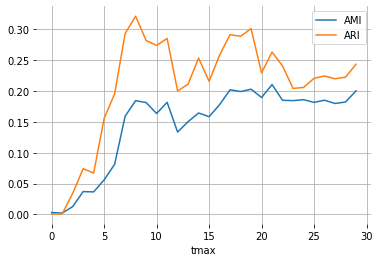

In [78]:
results.groupby('tmax').std().plot()
plt.savefig('Rock_moon_hypersearch_std.png')

In [44]:
results.groupby('tmax').mean()

,AMI,ARI
tmax,,
0,0.135045,0.003757
1,0.172393,0.007604
2,0.335506,0.157039
3,0.424692,0.307725
4,0.380357,0.273729
5,0.379806,0.266010
6,0.388458,0.212097
7,0.392461,0.230316
8,0.425538,0.285492


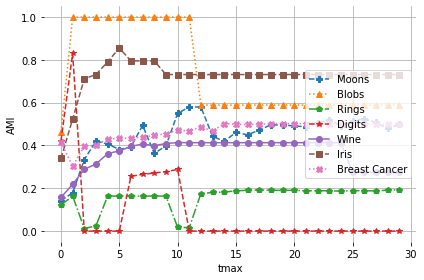

In [ ]:
import matplotlib.pyplot as plt

plt.plot(tmaxs, results[results['Dataset'] == 'Moons']['AMI'], linestyle='--', marker='P', label='Moons')
plt.plot(tmaxs, results[results['Dataset'] == 'Blobs']['AMI'], linestyle=":", marker='^', label='Blobs')
plt.plot(tmaxs, results[results['Dataset'] == 'Circles']['AMI'], linestyle='-.', marker='p', label='Rings')
plt.plot(tmaxs, results[results['Dataset'] == 'Digits']['AMI'], linestyle='--', marker='*',  label='Digits')
plt.plot(tmaxs, results[results['Dataset'] == 'Wine']['AMI'], linestyle='-', marker='o', label='Wine')
plt.plot(tmaxs, results[results['Dataset'] == 'Iris']['AMI'], linestyle='--', marker='s', label='Iris')
plt.plot(tmaxs, results[results['Dataset'] == 'Breast Cancer']['AMI'], linestyle=':', marker='X', label='Breast Cancer')
plt.xlabel('tmax')
plt.ylabel('AMI')
plt.tight_layout()
plt.legend(loc='right')
plt.savefig('ROCK_hyper_search.png')


In [ ]:
results.to_csv('ROCK_hyper.csv')